In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style="whitegrid")


In [2]:
# Load dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Quick checks
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Info about columns
df.info()

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Target variable distribution
print("\nChurn distribution:\n", df['Churn'].value_counts())
print("\nChurn percentage:\n", df['Churn'].value_counts(normalize=True)*100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\geeth\AppData\Local\Temp\ipykernel_21880\2772243174.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


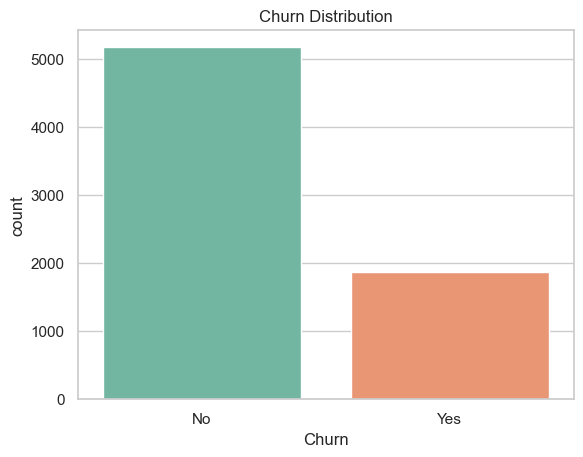

In [4]:
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()


In [5]:
# Exploratory Data Analysis (EDA)
# 1. Look at Numerical Features
# Convert TotalCharges to numeric (it sometimes has spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print("Missing TotalCharges:", df['TotalCharges'].isna().sum())

# Drop rows where TotalCharges is NaN (only a few)
df = df.dropna(subset=['TotalCharges'])


Missing TotalCharges: 11


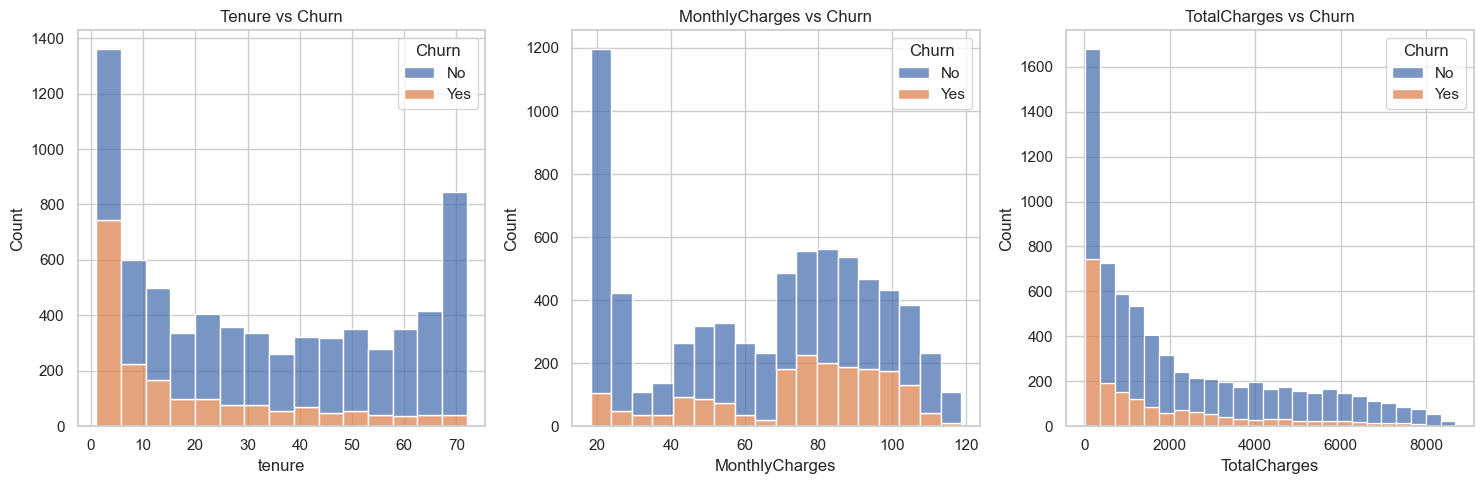

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", ax=ax[0])
ax[0].set_title("Tenure vs Churn")

sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", ax=ax[1])
ax[1].set_title("MonthlyCharges vs Churn")

sns.histplot(data=df, x="TotalCharges", hue="Churn", multiple="stack", ax=ax[2])
ax[2].set_title("TotalCharges vs Churn")

plt.tight_layout()
plt.show()


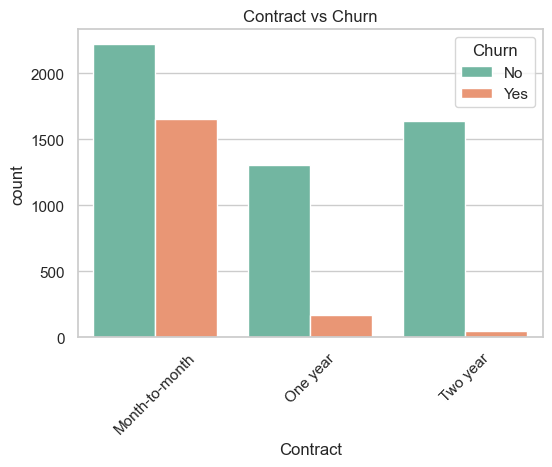

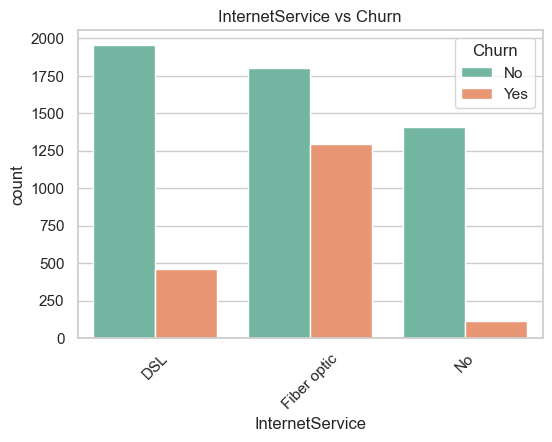

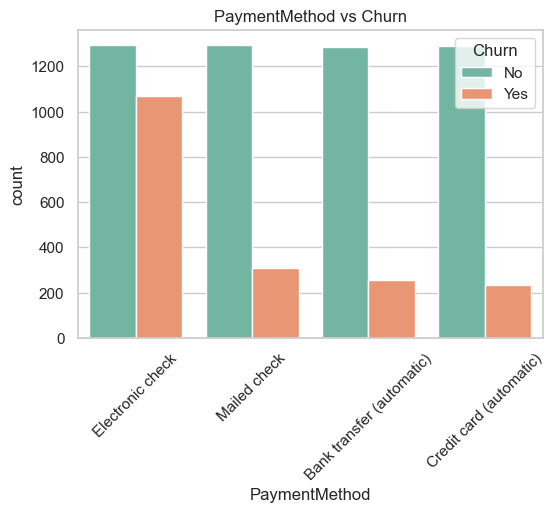

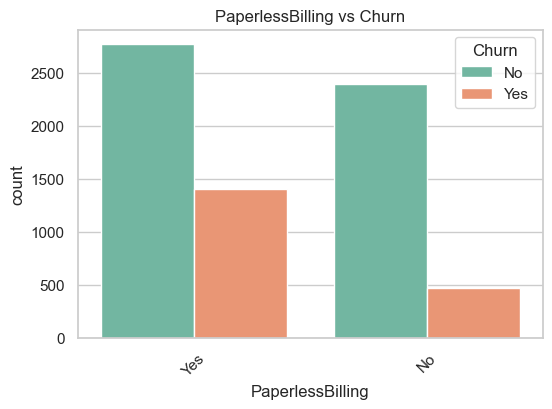

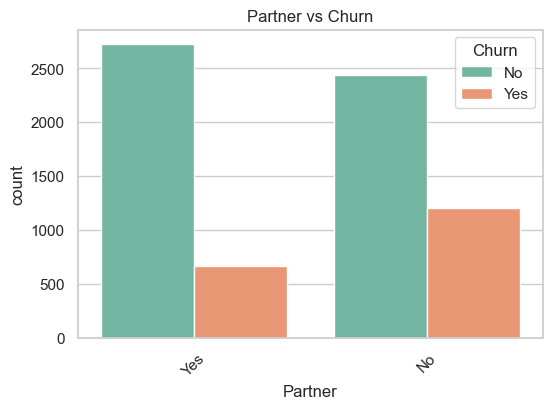

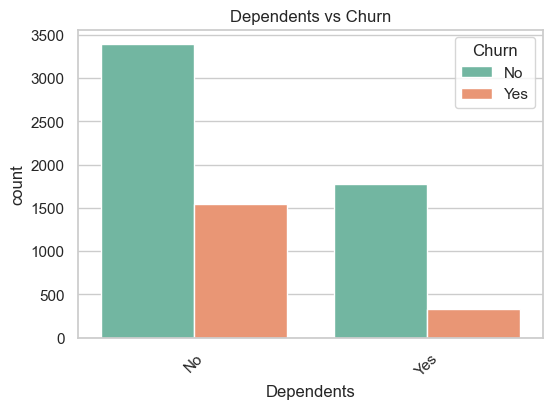

In [7]:
# 2. Look at Categorical Features
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 
                        'PaperlessBilling', 'Partner', 'Dependents']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


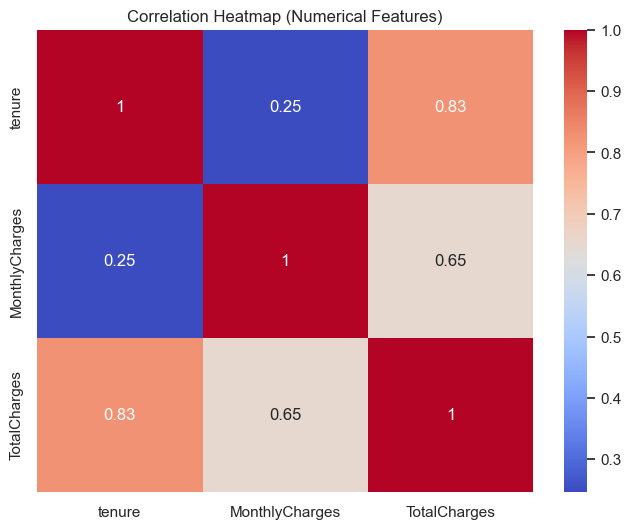

In [8]:
# 3. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [9]:
# Preprocessing & Feature Engineering
# 1. Drop Irrelevant Columns
df = df.drop('customerID', axis=1)
# 2. Encode the Target Variable
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
# 3. Separate Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']
# 4. Handle Categorical Variables
X = pd.get_dummies(X, drop_first=True)
# 5. Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[num_features] = scaler.fit_transform(X[num_features])


In [10]:
# 6. Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (5625, 30) Test size: (1407, 30)


In [11]:
# Model Building & Evaluation
# 1. Logistic Regression (Baseline Model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC Score: 0.8360144638688001


In [12]:
# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))


Random Forest Results:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC Score: 0.8178453287501747


In [13]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Results:\n")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))


C:\Users\geeth\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

ROC-AUC Score: 0.8196701368217795


In [14]:
import joblib, os

# Make sure "models" folder exists at project root
os.makedirs("../models", exist_ok=True)

# Save the Logistic Regression model, scaler, and feature names
joblib.dump(log_reg, "../models/churn_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(X_train.columns.tolist(), "../models/feature_names.pkl")

print("✅ Model, scaler, and feature names saved in ../models/")


✅ Model, scaler, and feature names saved in ../models/


In [15]:
results = {
    "Logistic Regression": roc_auc_score(y_test, y_prob_lr),
    "Random Forest": roc_auc_score(y_test, y_prob_rf),
    "XGBoost": roc_auc_score(y_test, y_prob_xgb),
}
print("ROC-AUC Comparison:\n", results)


ROC-AUC Comparison:
 {'Logistic Regression': np.float64(0.8360144638688001), 'Random Forest': np.float64(0.8178453287501747), 'XGBoost': np.float64(0.8196701368217795)}


In [16]:
# Step 9: Churn Risk Scoring & CHURN_FLAG
# 1. Generate Risk Scores (Probabilities)
# Predict churn probabilities using Logistic Regression
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Create a dataframe with results
results_df = pd.DataFrame({
    "CustomerIndex": X_test.index,
    "Churn_Probability": y_scores,
    "Churn_Actual": y_test.values
})
results_df.head()


,CustomerIndex,Churn_Probability,Churn_Actual
0,974,0.018040,0
1,619,0.592042,0
2,4289,0.004946,0
3,3721,0.200721,1
4,4533,0.103427,0


In [17]:
# 2. Create CHURN_FLAG (Yes/No as 1/0)
# Threshold can be tuned later
threshold = 0.5
results_df["CHURN_FLAG"] = (results_df["Churn_Probability"] >= threshold).astype(int)

results_df.head()


,CustomerIndex,Churn_Probability,Churn_Actual,CHURN_FLAG
0,974,0.018040,0,0
1,619,0.592042,0,1
2,4289,0.004946,0,0
3,3721,0.200721,1,0
4,4533,0.103427,0,0


In [18]:
# 3. Merge Back with Original Features 
# Reattach customer info for business reporting
final_output = df.loc[X_test.index].copy()
final_output["Churn_Probability"] = y_scores
final_output["CHURN_FLAG"] = results_df["CHURN_FLAG"].values

final_output.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Probability,CHURN_FLAG
974,Female,0,Yes,Yes,59,Yes,No,DSL,No,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),75.95,4542.35,0,0.018040,0
619,Female,0,No,No,7,Yes,Yes,Fiber optic,No,Yes,...,No,No,Month-to-month,Yes,Bank transfer (automatic),78.55,522.95,0,0.592042,1
4289,Female,0,No,No,54,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.10,1079.45,0,0.004946,0
3721,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,38.70,1,0.200721,0
4533,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.15,7555.00,0,0.103427,0


In [19]:
import os

# Create 'reports' folder if it doesn't exist
os.makedirs("reports", exist_ok=True)

# Now save
final_output.to_csv("reports/Churn_Risk_Scoring.csv", index=False)
print("✅ Final churn scoring file saved at reports/Churn_Risk_Scoring.csv")


✅ Final churn scoring file saved at reports/Churn_Risk_Scoring.csv


In [20]:
final_output.to_csv("reports/Churn_Risk_Scoring.csv", index=False)
print("✅ Final churn scoring file saved at reports/Churn_Risk_Scoring.csv")


✅ Final churn scoring file saved at reports/Churn_Risk_Scoring.csv


In [21]:
# Feature Importance & Business Insights
# 1. Feature Importance from Logistic Regression
# Get feature importance (coefficients)
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
})

# Sort by absolute value
importance["Abs_Coefficient"] = importance["Coefficient"].abs()
importance = importance.sort_values(by="Abs_Coefficient", ascending=False)

importance.head(10)


,Feature,Coefficient,Abs_Coefficient
25,Contract_Two year,-1.364197,1.364197
1,tenure,-1.348550,1.348550
10,InternetService_Fiber optic,1.108470,1.108470
24,Contract_One year,-0.748888,0.748888
3,TotalCharges,0.634001,0.634001
7,PhoneService_Yes,-0.517122,0.517122
2,MonthlyCharges,-0.430947,0.430947
28,PaymentMethod_Electronic check,0.380924,0.380924
13,OnlineSecurity_Yes,-0.373453,0.373453
21,StreamingTV_Yes,0.371831,0.371831


In [22]:
# 2. Feature Importance from Random Forest (for comparison)
rf_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_importance.head(10)


,Feature,Importance
3,TotalCharges,0.194313
1,tenure,0.168529
2,MonthlyCharges,0.167972
10,InternetService_Fiber optic,0.038913
28,PaymentMethod_Electronic check,0.037898
25,Contract_Two year,0.031862
4,gender_Male,0.028939
13,OnlineSecurity_Yes,0.027288
26,PaperlessBilling_Yes,0.025595
5,Partner_Yes,0.023280


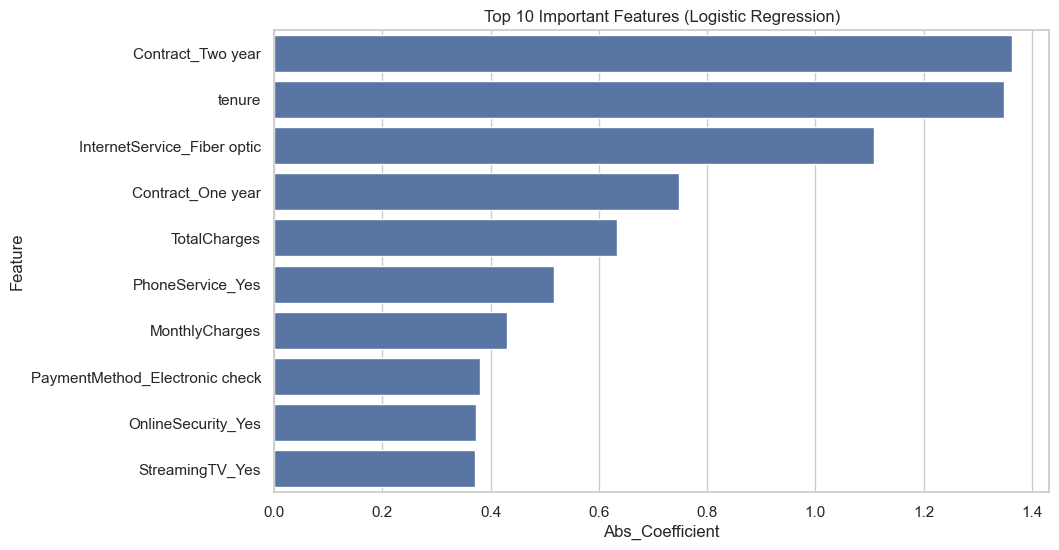

In [23]:
# 3. Visualize Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x="Abs_Coefficient", y="Feature", data=importance.head(10))
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()
